In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the data
df = pd.read_csv("train.csv")

# EDA

In [4]:
# display the data
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [80]:
df.shape

(58592, 44)

In [81]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

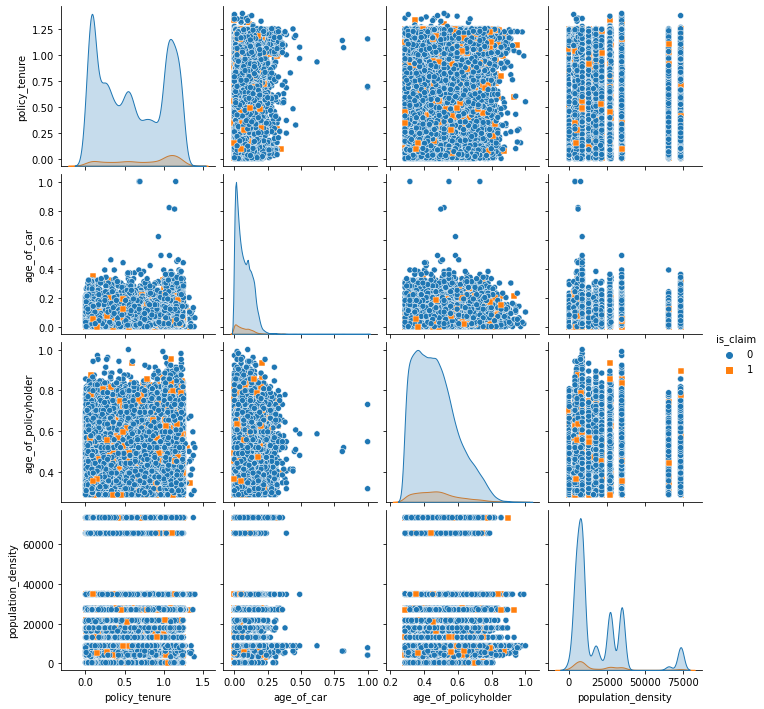

In [82]:
# Select the numerical columns and the target variable
numerical_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density']
target_var = 'is_claim'
df_num = df[numerical_cols + [target_var]]

# Plot a pairplot of the numerical variables
sns.pairplot(df_num, hue=target_var, markers=['o', 's'])
plt.show()

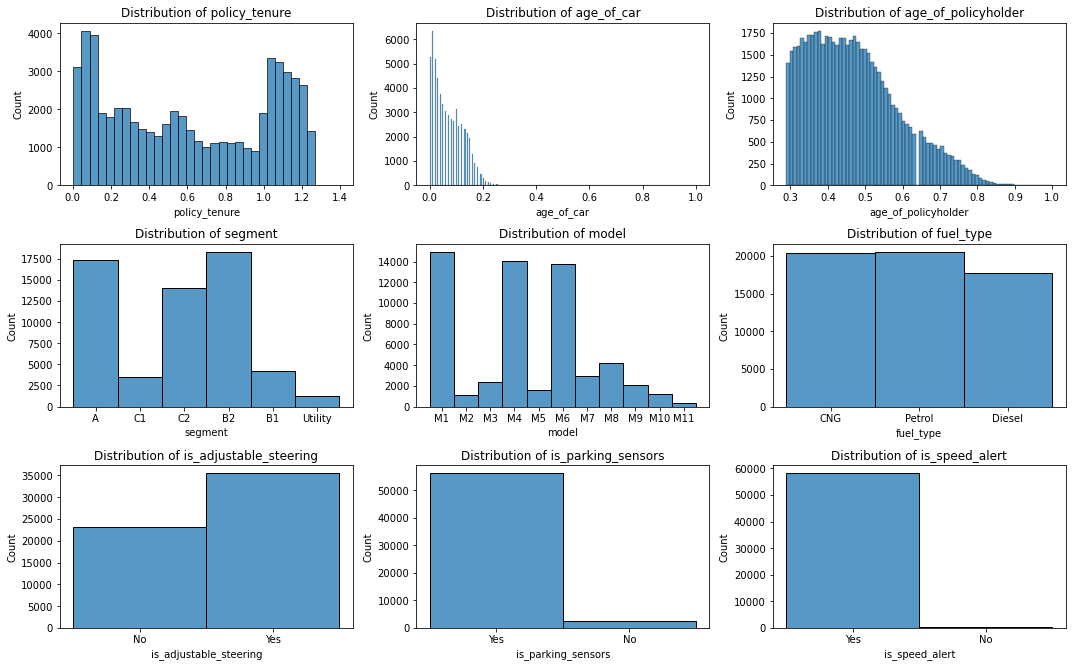

In [20]:
# Select the categorical columns
numerical_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
                     'segment','model','fuel_type','is_adjustable_steering',
                     'is_parking_sensors', 'is_speed_alert']

# Set up the subplot layout
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axs = axs.flatten()

# Plot the distribution for each column
for i, col in enumerate(numerical_columns):
    sns.histplot(data = df, x=col, kde=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

# Hide the unused subplots
for j in range(i+1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


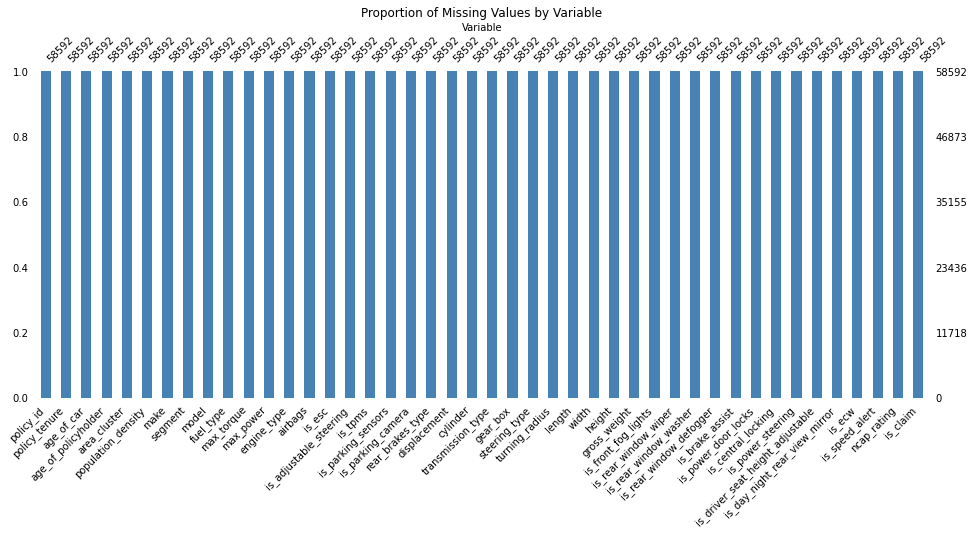

In [41]:
import missingno as msno

# Plot missing values as a bar chart
msno.bar(df,
         figsize=(16,6),  # Set the figure size
         color='steelblue',    # Set the bar color
         fontsize=10,    # Set the font size
         labels=True,    # Show the variable labels
         log=False)      # Use a linear scale

# Customize the plot
plt.title('Proportion of Missing Values by Variable', fontsize=12)
plt.ylabel('Proportion of Missing Values', fontsize=10)
plt.xlabel('Variable', fontsize=10)

plt.show()


In [42]:
# lists name of columns
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

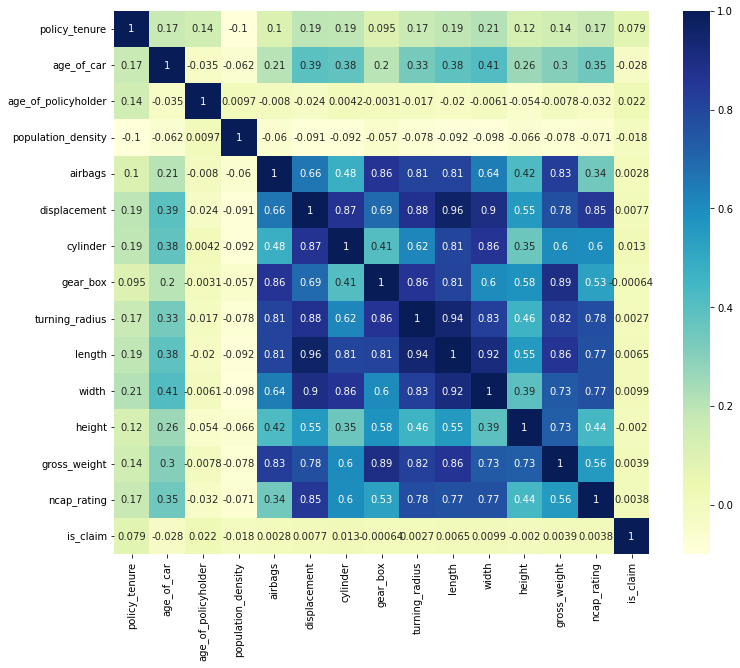

In [43]:
# Select the numerical columns and the target variable
numerical_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density',
                  'airbags','displacement','cylinder','gear_box','turning_radius',
                  'length','width','height','gross_weight','ncap_rating']
target_var = 'is_claim'
df_num = df[numerical_cols + [target_var]]

# Calculate the correlation matrix
corr_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# Display the plot
plt.show()

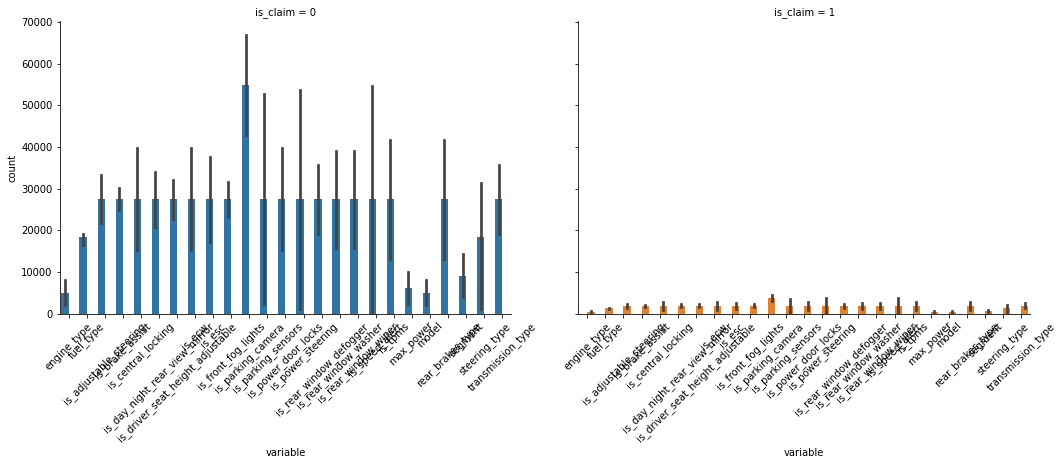

In [39]:
# plot the relationship between all categorical variable and the target variable

# Select the categorical columns and the target variable
categorical_cols = ['segment','model','fuel_type','max_power','engine_type',
                    'is_esc','is_adjustable_steering','is_tpms','is_parking_sensors',
                   'is_parking_camera','is_parking_camera','rear_brakes_type',
                   'transmission_type','steering_type','is_front_fog_lights','is_rear_window_wiper',
                   'is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks',
                   'is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror',
                   'is_ecw','is_speed_alert']

target_var = 'is_claim'
df_cat = df[categorical_cols + [target_var]]

# Melt the DataFrame to create long-form data for the stacked bar chart
df_cat_melted = df_cat.melt(id_vars=target_var, var_name='variable')

# Count the frequency of each category in each class of the target variable
df_cat_freq = df_cat_melted.groupby(['variable', target_var, 'value']).size().reset_index(name='count')

# Plot a stacked bar chart of the frequency of each category
g=sns.catplot(x='variable', y='count', hue=target_var, col=target_var, data=df_cat_freq, kind='bar', height=5, aspect=1.5)
g.set_xticklabels(rotation=45)
plt.show()


# Preprocessing 

In [84]:
# check the balance
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [85]:
df['is_claim'].value_counts()/df.shape[0] * 100

0    93.603222
1     6.396778
Name: is_claim, dtype: float64

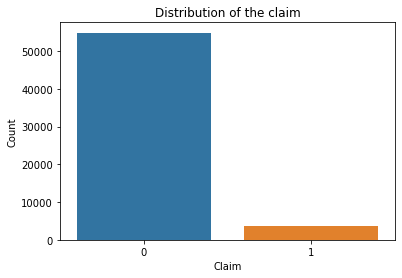

In [86]:
# Plot the distribution of the target variable
sns.countplot(df['is_claim'])
plt.title('Distribution of the claim')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.show()

# Spliting the dataset 

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [6]:
X = df.drop(["is_claim","policy_id"], axis=1)
y = df["is_claim"]
print(X.shape, y.shape)

(58592, 42) (58592,)


In [7]:
# split the data into training and testing sets, with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Oversampling

In [8]:
# Over sample the training set to prevent data leakage
# RandomOverSampler to handle imbalanced data

os = RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_res, y_res = os.fit_resample(X_train, y_train)

X_res.shape, y_res.shape

((78985, 42), (78985,))

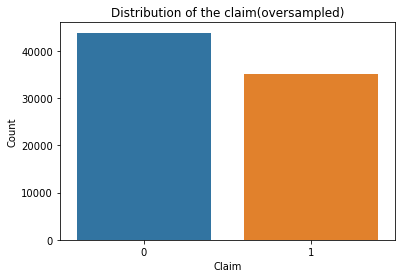

In [9]:
# Plot the distribution of the target variable after oversampling
sns.countplot(y_res)
plt.title('Distribution of the claim(oversampled)')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.show()

# Modelling

In [10]:
# investigate 4 types of model to examine which one has the better performance

lr = make_pipeline(OneHotEncoder(),LogisticRegression())
dt = make_pipeline(OrdinalEncoder(),DecisionTreeClassifier(random_state=1))
rf = make_pipeline(OrdinalEncoder(),RandomForestClassifier(random_state=1))
gb = make_pipeline(OrdinalEncoder(),GradientBoostingClassifier(random_state=1))

In [11]:
model_list = [("lr", lr),("dt", dt),("rf", rf),("gb", gb)]

In [12]:
for name, model in model_list:
    
    model.fit(X_res, y_res)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    
    print(f"The test accuracy score of {name} is {score}")
    

The test accuracy score of lr is 0.9354893762266405
The test accuracy score of dt is 0.8807918764399693
The test accuracy score of rf is 0.9165457803566858
The test accuracy score of gb is 0.6947691782575305


# Final Model

In [13]:
params = {"randomforestclassifier__n_estimators":range(25,125,25)}

In [14]:
Model = GridSearchCV(rf,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model.fit(X_res, y_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['area_cluster',
                                                             'segment', 'model',
                                                             'fuel_type',
                                                             'max_torque',
                                                             'max_power',
                                                             'engine_type',
                                                             'is_esc',
                                                             'is_adjustable_steering',
                                                             'is_tpms',
                                                             'is_parking_sensors',
                                                             'is_parking_camera',
                                                             'rear_brak

In [15]:
Model.best_score_

0.9838450338671899

In [16]:
Model.best_params_

{'randomforestclassifier__n_estimators': 50}

In [17]:
y_pred_test =  Model.predict(X_test)
print(round(accuracy_score(y_test, y_pred_test),2))

0.92


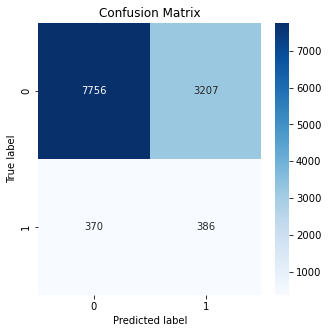

In [107]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [109]:
# calculate the precision, recall, and F1 score of the model
Acc = accuracy_score(y_test,y_pred) 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print('Accuracy:', Acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6947691782575305
Precision: 0.10743111605900361
Recall: 0.5105820105820106
F1 score: 0.17751207174063005


# Feature importance

In [254]:
# compute feature importances
importances = rf.feature_importances_

# create a pandas DataFrame with the feature importances
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# sort the DataFrame by feature importance in descending order
importances_df = importances_df.sort_values('importance', ascending=False)

# drop the target variable from the list of important features
top_variables = importances_df[importances_df['feature'] != 'is_claim'].head(10)

In [255]:
top_variables

,feature,importance
0,policy_tenure,0.417664
2,age_of_policyholder,0.276811
1,age_of_car,0.200361
3,population_density,0.024167
52,area_cluster_C8,0.005276
43,area_cluster_C2,0.004593
49,area_cluster_C5,0.003918
47,area_cluster_C3,0.003798
37,area_cluster_C14,0.003699
36,area_cluster_C13,0.003683


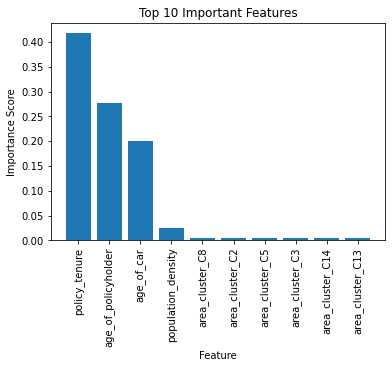

In [256]:
# create a bar plot of the top 10 important variables
plt.bar(top_variables['feature'], top_variables['importance'])
plt.xticks(rotation=90)
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.title('Top 10 Important Features')
plt.show()

# Test

In [118]:
test = pd.read_csv("test.csv")
test = test.drop(["policy_id"],axis=1)
test.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0


In [126]:
test.shape

(39063, 42)

In [127]:
Predictions = pd.DataFrame(Model.predict(test), index=test.index, columns=["is_claim"])

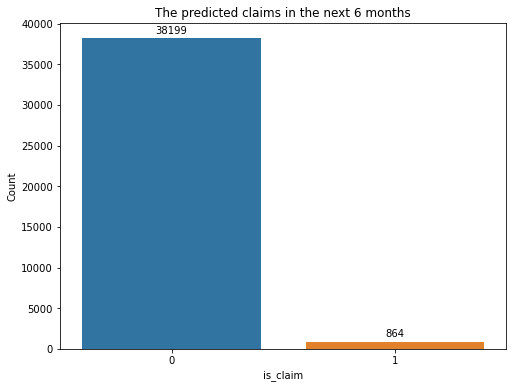

In [131]:
# Set the size of the plot
plt.figure(figsize=(8,6))

# Plot the countplot
ax = sns.countplot(x="is_claim", data=Predictions)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.0f}'.format(height), 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom')

# Add plot title and axes labels
plt.title("The predicted claims in the next 6 months")
plt.xlabel("is_claim")
plt.ylabel("Count")

# Show the plot
plt.show()


In [128]:
Predictions.to_csv("Sample.csv")